In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt


In [54]:
df =  pd.read_csv("/breast-cancer.csv")

In [55]:
print(df.shape)

(569, 32)


In [56]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [58]:
print(df.isnull().sum().sum())

0


In [59]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [60]:
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [61]:
df["diagnosis"]= df["diagnosis"].map({"B":0,"M":1})

In [62]:
x = df.iloc[:,2:]
y = df["diagnosis"]

In [63]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [64]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [65]:
x_train,x_test,y_train,y_test = train_test_split( x, y ,test_size=0.2, random_state= 42, stratify=y)

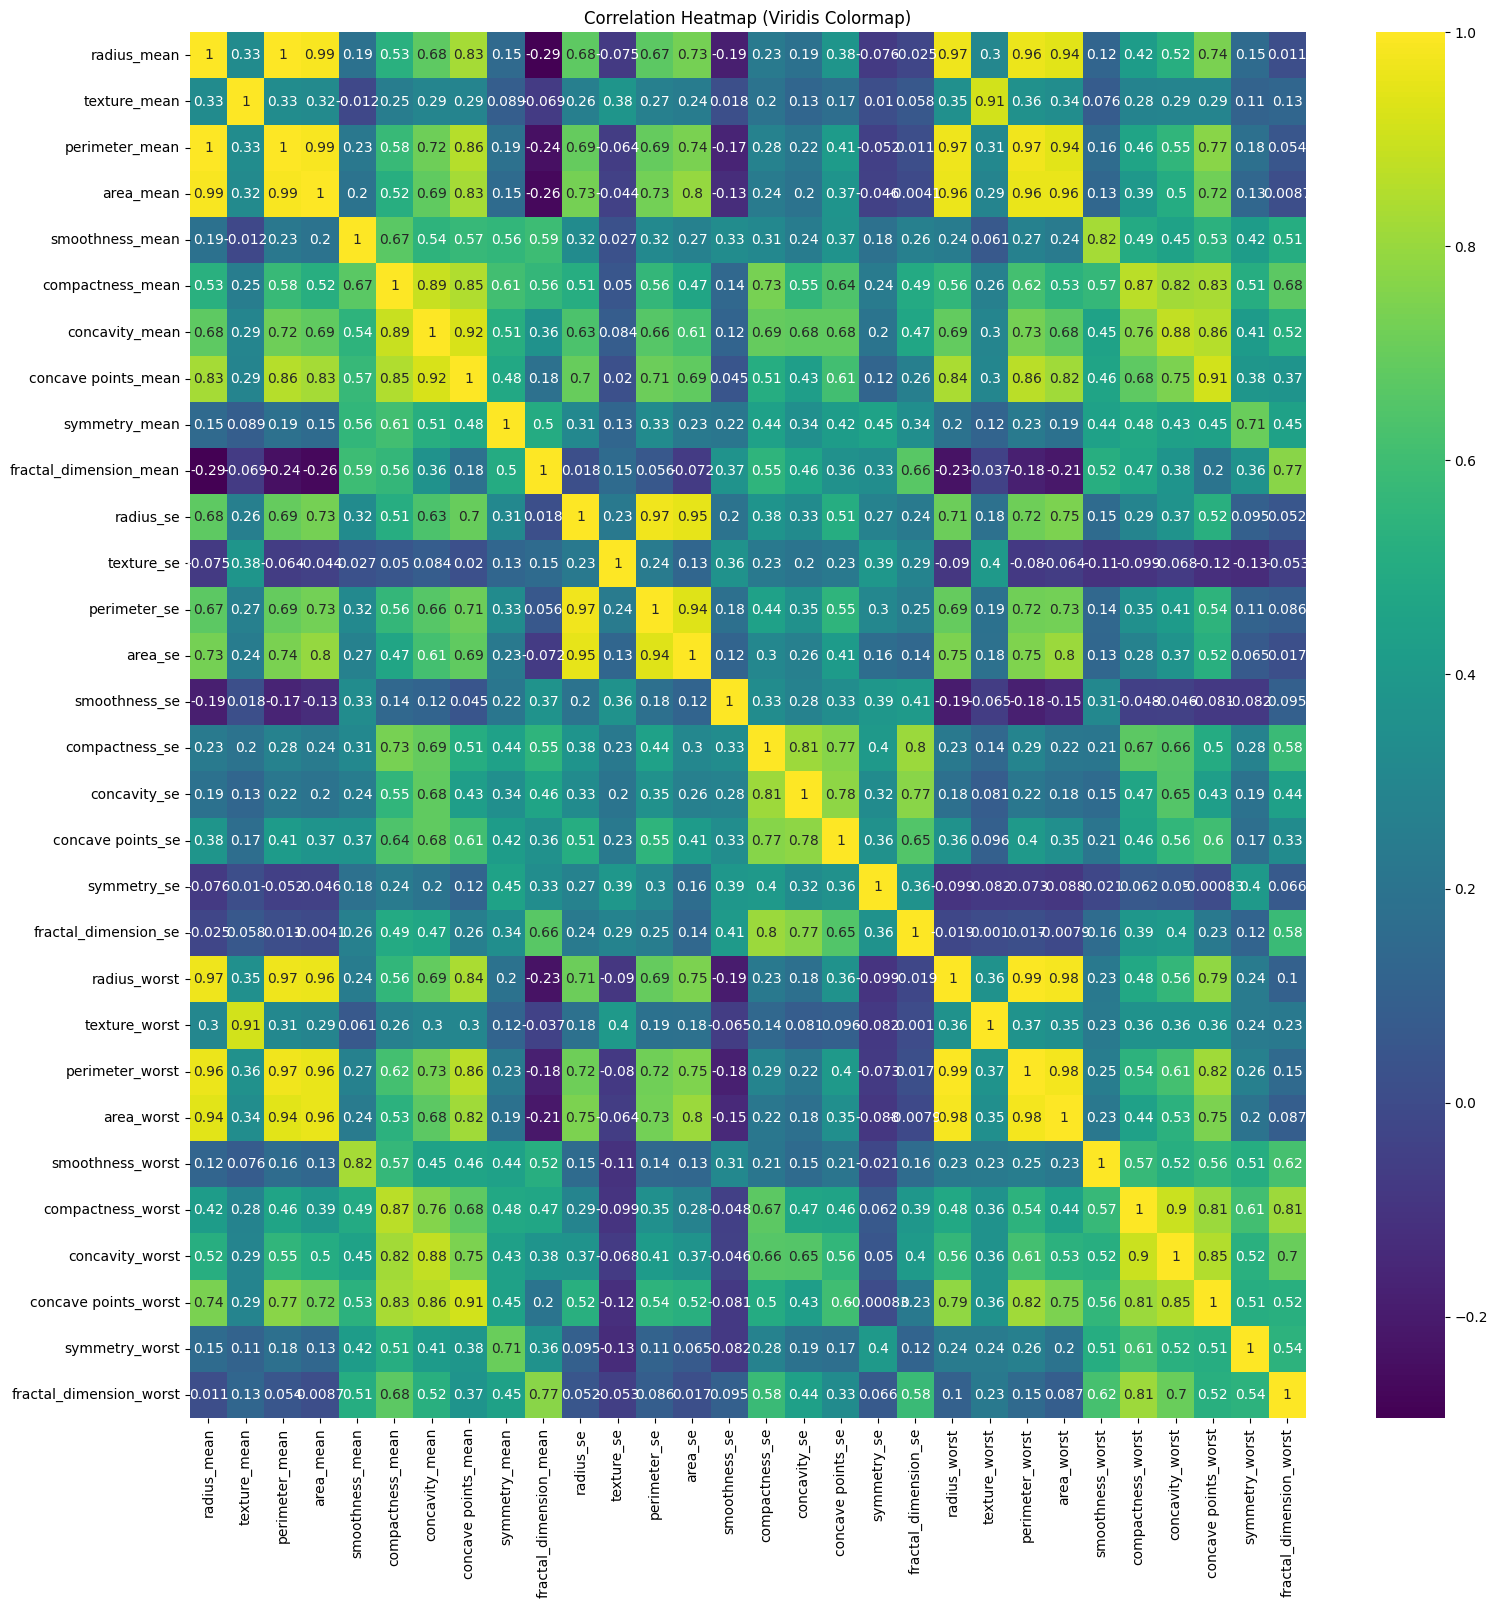

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 18))
corr = x_train.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap="viridis")
plt.title("Correlation Heatmap (Viridis Colormap)")
plt.show()

In [67]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [68]:
correlation_features = correlation(x_train, 0.9)

In [69]:
correlation_features

{'area_mean',
 'area_se',
 'area_worst',
 'concave points_mean',
 'concave points_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_worst',
 'texture_worst'}

In [70]:
x_train_dropped = x_train.drop(correlation_features,axis=1)
x_train_dropped

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
10,16.02,23.24,0.08206,0.06669,0.03299,0.1528,0.05697,0.3795,1.1870,0.004029,0.009269,0.011010,0.007591,0.01460,0.003042,0.11810,0.15510,0.14590,0.2948,0.08452
170,12.32,12.39,0.10280,0.06981,0.03987,0.1959,0.05955,0.2360,0.6656,0.008045,0.011800,0.016830,0.012410,0.01924,0.002248,0.13850,0.12660,0.12420,0.2827,0.06771
407,12.85,21.37,0.07551,0.08316,0.06126,0.1580,0.06114,0.4993,1.7980,0.006011,0.044800,0.051750,0.013410,0.02669,0.007731,0.09402,0.19360,0.18380,0.2488,0.08151
430,14.90,22.53,0.09947,0.22250,0.27330,0.2041,0.06898,0.2530,0.8749,0.006965,0.062130,0.079260,0.022340,0.01499,0.005784,0.14190,0.70900,0.90190,0.2866,0.11550
27,18.61,20.25,0.09440,0.10660,0.14900,0.1697,0.05699,0.8529,1.8490,0.010750,0.027220,0.050810,0.019110,0.02293,0.004217,0.13380,0.21170,0.34460,0.2341,0.07421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,13.03,18.42,0.08983,0.03766,0.02562,0.1467,0.05863,0.1839,2.3420,0.004352,0.004899,0.013430,0.011640,0.02671,0.001777,0.09701,0.04619,0.04833,0.1987,0.06169
415,11.89,21.17,0.09773,0.08120,0.02555,0.2019,0.06290,0.2747,1.2030,0.009895,0.030530,0.016300,0.009276,0.02258,0.002272,0.14260,0.21870,0.11640,0.3075,0.07351
458,13.00,25.13,0.08369,0.05073,0.01206,0.1667,0.05449,0.2621,1.2320,0.006054,0.008974,0.005681,0.006336,0.01215,0.001514,0.12180,0.10930,0.04462,0.2306,0.06291
476,14.20,20.53,0.08931,0.11080,0.05063,0.1506,0.06009,0.3478,1.0180,0.004107,0.032880,0.028210,0.013500,0.01610,0.002744,0.11530,0.34290,0.25120,0.2534,0.07858


In [71]:
x_test_dropped = x_test.drop(correlation_features,axis=1)

In [72]:
x_train_dropped.shape, x_test_dropped.shape

((455, 20), (114, 20))

In [73]:
model = LogisticRegression()

In [74]:
model.fit(x_train_dropped.values, y_train.values)

LogisticRegression()

In [75]:
x_training_prediction = model.predict(x_train_dropped.values)
training_acc_score = accuracy_score(y_train, x_training_prediction)

In [76]:
print(training_acc_score)

0.9362637362637363


In [77]:
x_testing_prediction = model.predict(x_test_dropped.values)
testing_acc_score = accuracy_score(y_test.values, x_testing_prediction)
print(testing_acc_score)

0.9298245614035088


In [51]:
radius_mean = float(input("Enter the mean radius: "))
texture_mean = float(input("Enter the mean texture: "))
smoothness_mean = float(input("Enter the mean smoothness: "))
compactness_mean = float(input("Enter the mean compactness: "))
concavity_mean = float(input("Enter the mean concavity: "))
symmetry_mean = float(input("Enter the mean symmetry: "))
fractal_dimension_mean = float(input("Enter the mean fractal_dimension: "))
radius_se = float(input("Enter the standard error radius: "))
texture_se = float(input("Enter the standard error texture: "))
smoothness_se = float(input("Enter the standard error smoothness: "))
compactness_se = float(input("Enter the standard error compactness: "))
concavity_se = float(input("Enter the standard error concavity: "))
concave_points_se = float(input("Enter the standard error concave points: "))
symmetry_se = float(input("Enter the standard error symmetry: "))
fractal_dimension_se = float(input("Enter the standard error fractal dimension: "))
smoothness_worst = float(input("Enter the worst smoothness: "))
compactness_worst = float(input("Enter the worst compactness: "))
concavity_worst = float(input("Enter the worst concavity: "))
symmetry_worst = float(input("Enter the worst symmetry: "))
fractal_dimension_worst = float(input("Enter the worst fractal dimension: "))

feature_values = np.array([[
    radius_mean, texture_mean, smoothness_mean, compactness_mean, concavity_mean, symmetry_mean, fractal_dimension_mean,
    radius_se, texture_se, smoothness_se, compactness_se, concavity_se, concave_points_se, symmetry_se, fractal_dimension_se,
    smoothness_worst, compactness_worst, concavity_worst, symmetry_worst, fractal_dimension_worst
]])
prediction = model.predict(feature_values)

if (prediction == 0):
  print('The Breast cancer is Benign')
else:
  print('The Breast Cancer is Malignant')


Enter the mean radius: 17.644
Enter the mean texture: 20.530
Enter the mean smoothness: 0.04378
Enter the mean compactness: 0.0736
Enter the mean concavity: 0.05821
Enter the mean symmetry: 0.04792
Enter the mean fractal_dimension: 0.05912
Enter the standard error radius: 0.4821
Enter the standard error texture: 0.10345
Enter the standard error smoothness: 0.03095
Enter the standard error compactness: 0.0793
Enter the standard error concavity: 0.0843
Enter the standard error concave points: 0.7922
Enter the standard error symmetry: 0.08274
Enter the standard error fractal dimension: 0.3042
Enter the worst smoothness: 0.04189
Enter the worst compactness: 0.8427
Enter the worst concavity: 0.02748
Enter the worst symmetry: 0.06913
Enter the worst fractal dimension: 0.02846
The Breast Cancer is Malignant
